In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [20]:
path = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(path)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


**Part 1: Understanding Product Categories**\
What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. Frequency Tables:
- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

2. Visualizations:
- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [34]:
frequency_table = df.category.value_counts().reset_index()
frequency_table.columns = ['category', 'count']
frequency_table_top_5 = frequency_table.head(5)
frequency_table_top_5

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


<Axes: xlabel='count', ylabel='category'>

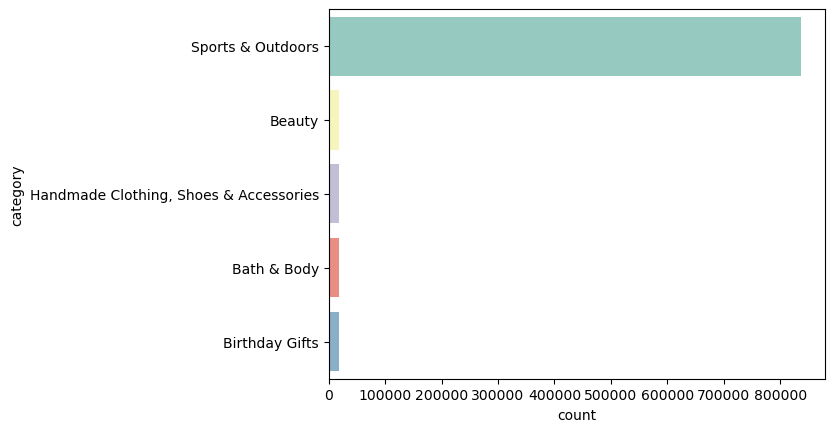

In [51]:
sns.barplot(y=frequency_table_top_5['category'], x=frequency_table_top_5['count'], palette="Set3")

<Axes: ylabel='count'>

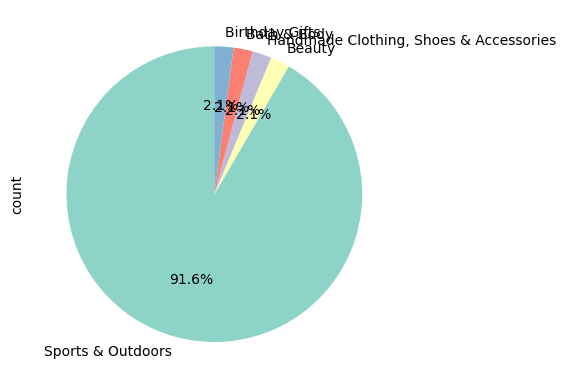

In [47]:
df.category.value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

**Part 2: Delving into Product Pricing**\
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:
- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. Measures of Dispersion:
- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

3. Visualizations:
- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [80]:
mean = df.price.mean()
median = df.price.median()
mode = df.price.mode()

print(
    f"The mean is: {mean}\n"
    f"The median is: {median}\n"
    f"The mode is: {mode[0]}"
)

The mean is: 89.24380943923663
The median is: 19.09
The mode is: 9.99


In [70]:
sd = df.price.std()
var = df.price.var()
price_range = df.price.max() - df.price.min()
quantiles = df.price.quantile([0.25, 0.75])
interquartile_range = quantiles[0.75] - quantiles[0.25]
sd, var, price_range, interquartile_range

# There appears to be a wide spread in prices given that the price_range is 100000.
# However, most of the products are priced within a much tighter range of 36.

(345.6088617535223, 119445.4853225653, 100000.0, 36.0)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

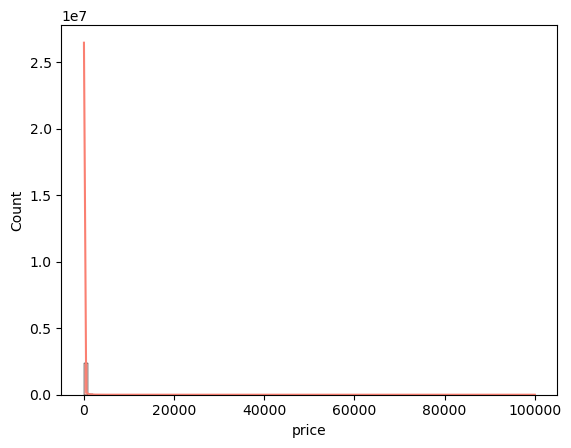

In [74]:
sns.histplot(df.price, kde=True, bins=100, color="salmon")

<Axes: >

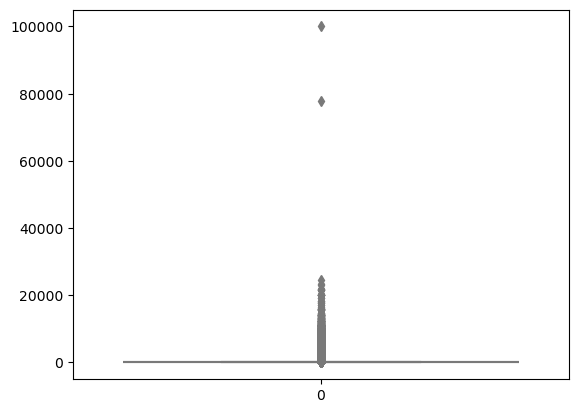

In [81]:
sns.boxplot(data = df.price, color="lightblue")

# Based on the charts above, the vast majority of prices fall within a tight range much closed to 0.
# There apear to be outliers above the upper wisker that provide a significant positive skew to the distribution.

**Part 3: Unpacking Product Ratings**

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:
- Calculate the mean, median, and mode for the `rating` of products.
- How do customers generally rate products? Is there a common trend?

2. Measures of Dispersion:
- Determine the variance, standard deviation, and interquartile range for product `rating`.
- Are the ratings consistent, or is there a wide variation in customer feedback?

3. Shape of the Distribution:
- Calculate the skewness and kurtosis for the `rating` column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

4. Visualizations:
- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [83]:
mean = df.stars.mean()
median = df.stars.median()
mode = df.stars.mode()

print(
    f"The mean is: {mean}\n"
    f"The median is: {median}\n"
    f"The mode is: {mode[0]}\n"
)

# It appears as though most ratings are very low assuming that products can be rated from 0-5 stars.

The mean is: 2.152836472966065
The median is: 0.0
The mode is: 0.0



In [85]:
sd = df.stars.std()
var = df.stars.var()
ratings_range = df.stars.max() - df.stars.min()
quantiles = df.stars.quantile([0.25, 0.75])
interquartile_range = quantiles[0.75] - quantiles[0.25]
sd, var, ratings_range, interquartile_range

print(
    f"The standard deviation is: {sd}\n"
    f"The variance is: {var}\n"
    f"The ratings range is: {ratings_range}\n"
    f"The interquartile range is: {interquartile_range}"
)

# It appears as though there is a significant range in ratings, given the fact that products can be 1-5 stars and the interquartile
# range is 4.4.

The standard deviation is: 2.1948653785054697
The variance is: 4.81743402976196
The ratings range is: 5.0
The interquartile range is: 4.4


In [90]:
skewness_stars = df.stars.skew()
kurtosis_stars = df.stars.kurtosis()

print(
    f"The skew is: {skewness_stars}\n"
    f"The kurtosis is: {kurtosis_stars}"
)

# A slightly positive skew exists, however, it does not appear to be statistically significant.
# A kurtosis of -1.93 indicates that the dataset is likely to have fewer extreme values (outliers) and the data points
# are more evenly spread around the mean, resulting in a flatter distribution.

The skew is: 0.08120735761080985
The kurtosis is: -1.9260061280432985


**Business Report**

1. A significant positive skew exists in the distribution of products across product categories, due to the exceptionally large number of products in the "Sports & Outdoors" category.
2. Some outliers in price also cause a significant positive skew, as the vast majority of products are priced within a much tighter range around the $20 point.
3. The is a fairly even and flat distribution across product ratings as reported by "stars". This is proven through a low skew of 0.08 and negative kurtosis of -1.9.